In [208]:
#1. 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target


In [209]:
#2.& 3. 모델에 입력할 데이터 X y 준비하기 (이미 <class 'numpy.ndarray'> 이므로 따로 변환 X)
print("X's type : "+str(type(df_X)))
print("y's type : "+str(type(df_y)))

X's type : <class 'numpy.ndarray'>
y's type : <class 'numpy.ndarray'>


In [210]:
#4. train, test 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2025)

In [211]:
#5. 모델 준비하기
import numpy as np

print("X.shape : " + str(df_X.shape)) # 10개의 피처 확인
print("y.shape : " + str(df_y.shape))
num_features = df_X.shape[1]

np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()


def Model(X, W=W, b=b):
    predict = np.dot(X, W) + b
    return predict

X.shape : (442, 10)
y.shape : (442,)


In [212]:
#6. 손실함수 loss 정의하기

def Loss(label, predict):
    return np.mean((label - predict)**2)

In [213]:
#7. 기울기를 구하는 gradient 함수 구현하기

def gradient(X, label, predict):
    n = label.shape[0]
    dW = 2 * np.dot(X.T, (predict - label)) / n
    db = 2 * np.mean(predict - label)
    return dW, db

In [214]:
#8. 하이퍼 파라미터인 학습률 정하기
learning_rate = [0.01, 0.1, 1]

In [215]:
#9. 모델 학습하기
epoch = 10000
losses_1, losses_2, losses_3 = [], [], []
min_loss_1, min_loss_2, min_loss_3 = float('inf'), float('inf'), float('inf')
best_W_1, best_b_1 = None, None
best_W_2, best_b_2 = None, None
best_W_3, best_b_3 = None, None
for idx, lr in enumerate(learning_rate):
    W_copy = W
    b_copy = b
    losses = []
    min_loss = float('inf')  # 현재 학습률에서 최소 손실값 초기화
    best_W, best_b = None, None  # 최소 손실값에서의 W, b 저장
    
    for _ in range(epoch):
        prediction = Model(X_train, W=W_copy, b=b_copy)
        loss = Loss(y_train, prediction)
        losses.append(loss)
        
        # 최소 손실값 갱신
        if loss < min_loss:
            min_loss = loss
            best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
            best_b = b_copy  # 최소 손실값에서의 b 저장
        
        dW, db = gradient(X_train, y_train, prediction)
        W_copy -= lr * dW
        b_copy -= lr * db

    # 손실값 기록 및 최소 손실 모델 업데이트
    if idx == 0:
        losses_1 = losses
        W_1, b_1 = W_copy, b_copy
        min_loss_1 = min_loss
        best_W_1, best_b_1 = best_W, best_b
    elif idx == 1:
        losses_2 = losses
        W_2, b_2 = W_copy, b_copy
        min_loss_2 = min_loss
        best_W_2, best_b_2 = best_W, best_b
    else:
        losses_3 = losses
        W_3, b_3 = W_copy, b_copy
        min_loss_3 = min_loss
        best_W_3, best_b_3 = best_W, best_b

Loss in test with learning rate = 0.01 : 3531.719360663796 
  W : [  21.48103642 -239.01795638  543.44936858  326.28125059 -323.34620601
  115.83437461 -132.57417773   37.32128896  586.9213699    57.37840222]
  b : 153.8177240614764

Loss in test with learning rate = 0.1 : 3169.6828381936434 
  W : [  21.48103642 -239.01795638  543.44936858  326.28125059 -323.34620601
  115.83437461 -132.57417773   37.32128896  586.9213699    57.37840222]
  b : 153.77210202265033

Loss in test with learning rate = 1 : 24617.25568685807 
  W : [  21.48103642 -239.01795638  543.44936858  326.28125059 -323.34620601
  115.83437461 -132.57417773   37.32128896  586.9213699    57.37840222]
  b : -30.760442966126902



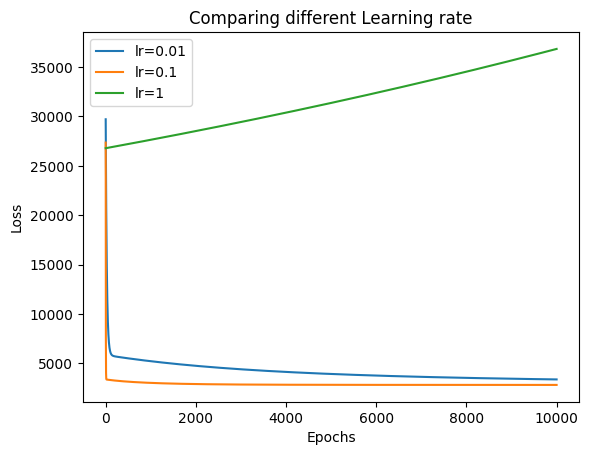

In [216]:
#10. test데이터에 대한 성능 확인하기
test_prediction_1 = Model(X_test, W=best_W_1, b=best_b_1)
test_prediction_2 = Model(X_test, W=best_W_2, b=best_b_2)
test_prediction_3 = Model(X_test, W=best_W_3, b=best_b_3)

loss_1 = Loss(y_test, test_prediction_1)
loss_2 = Loss(y_test, test_prediction_2)
loss_3 = Loss(y_test, test_prediction_3)

print("==========================================================================")
print(f"Loss in test with learning rate = {learning_rate[0]} : {loss_1} \n  W : {W_1}\n  b : {b_1}\n")
print(f"Loss in test with learning rate = {learning_rate[1]} : {loss_2} \n  W : {W_2}\n  b : {b_2}\n")
print(f"Loss in test with learning rate = {learning_rate[2]} : {loss_3} \n  W : {W_3}\n  b : {b_3}\n")

import matplotlib.pyplot as plt
plt.plot(losses_1, label= f'lr={learning_rate[0]}')
plt.plot(losses_2, label=f'lr={learning_rate[1]}')
plt.plot(losses_3, label=f'lr={learning_rate[2]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing different Learning rate')
plt.legend()
plt.savefig('Comparing different Learning rate at training.png')
plt.show()


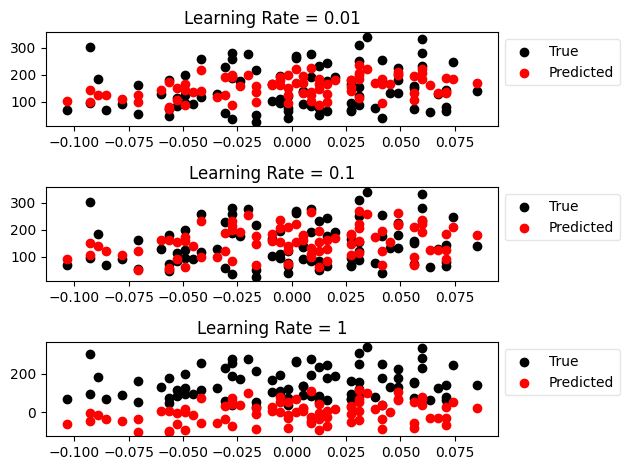

In [217]:
#11. 정답 데이터와 예측한 데이터 시각화하기기
fig, axes = plt.subplots(3, 1)

# Learning Rate = 0.01
axes[0].scatter(x=X_test[:, 0], y=y_test, color='black', label='True')
axes[0].scatter(x=X_test[:, 0], y=test_prediction_1, color='red', label='Predicted')
axes[0].set_title(f'Learning Rate = {learning_rate[0]}')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.5)

# Learning Rate = 0.1
axes[1].scatter(x=X_test[:, 0], y=y_test, color='black', label='True')
axes[1].scatter(x=X_test[:, 0], y=test_prediction_2, color='red', label='Predicted')
axes[1].set_title(f'Learning Rate = {learning_rate[1]}')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.5)

# Learning Rate = 1
axes[2].scatter(x=X_test[:, 0], y=y_test, color='black', label='True')
axes[2].scatter(x=X_test[:, 0], y=test_prediction_3, color='red', label='Predicted')
axes[2].set_title(f'Learning Rate = {learning_rate[2]}')
axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.5)

plt.tight_layout()
plt.savefig('Comparing different Learning rate at test.png')
plt.show()


In [218]:
#Loss 3000이하로 낮추기
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [219]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

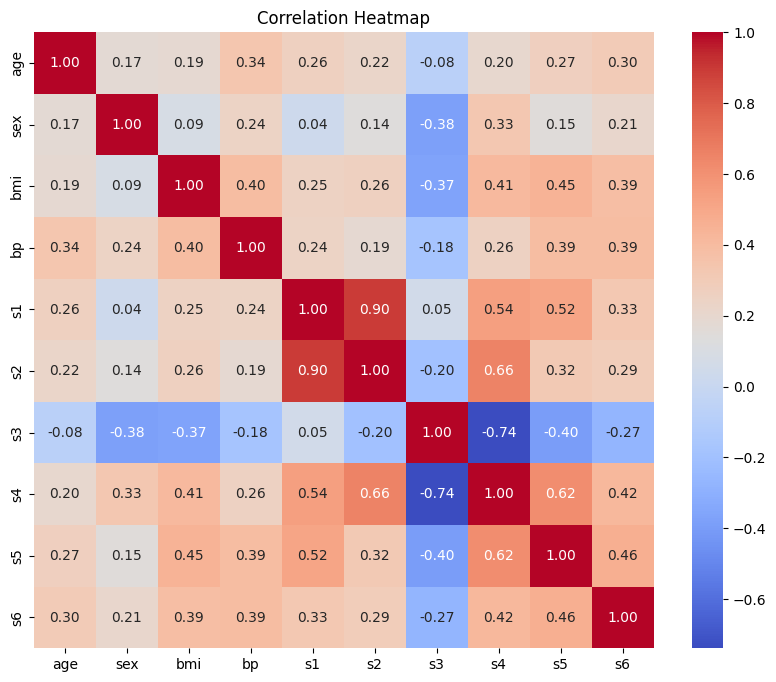

In [220]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#s1과 s2가 상관관계가 가장 높은 것을 확인, 그다음은 s3와 s4 : s1,s2,s3,s4의 피처를 빼보면서 테스트

In [221]:
df_X_without_s2 = np.delete(df_X, 5, axis=1)
learning_rate = 0.01

num_features = df_X_without_s2.shape[1]
np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_without_s2, df_y, test_size=0.2, random_state=2025)

In [222]:
#9. 모델 학습하기
epoch = 1000000
losses = []
min_loss = float('inf')
best_W, best_b = None, None

W_copy = W
b_copy = b
    
for _ in range(epoch):
    prediction = Model(X_train, W=W_copy, b=b_copy)
    loss = Loss(y_train, prediction)
    losses.append(loss)
    
    # 최소 손실값 갱신
    if loss < min_loss:
        min_loss = loss
        best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
        best_b = b_copy  # 최소 손실값에서의 b 저장
    
    dW, db = gradient(X_train, y_train, prediction)
    W_copy -= learning_rate * dW
    b_copy -= learning_rate * db

Loss in test with learning rate = 0.01 : 3177.2746132473303 
  W : [  23.65877882 -236.75381936  547.68359977  324.76428232 -218.01684399
 -153.12882715   65.53694245  542.67970479   56.52177745]
  b : 153.71501639331169



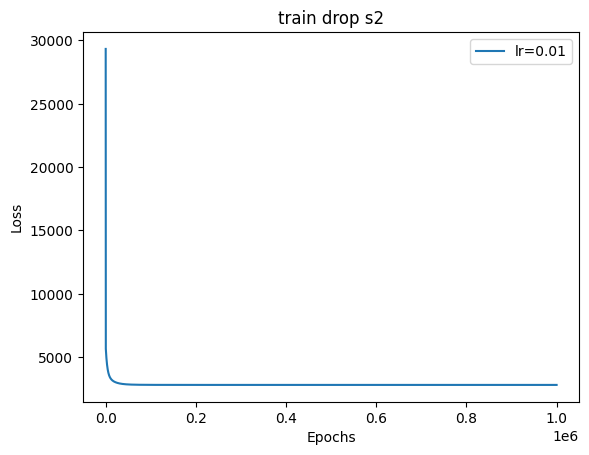

In [223]:
#10. test데이터에 대한 성능 확인하기
test_prediction = Model(X_test, W=best_W, b=best_b)

test_loss = Loss(y_test, test_prediction)

print("==========================================================================")
print(f"Loss in test with learning rate = {learning_rate} : {test_loss} \n  W : {best_W}\n  b : {best_b}\n")

import matplotlib.pyplot as plt
plt.plot(losses, label= f'lr={learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train drop s2')
plt.legend()
plt.show()


In [224]:
df_X_without_s2_s4 = np.delete(df_X, [5,7], axis=1)
learning_rate = 0.01

num_features = df_X_without_s2_s4.shape[1]
np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_without_s2_s4, df_y, test_size=0.2, random_state=2025)

In [225]:
#9. 모델 학습하기
epoch = 1000000
losses = []
min_loss = float('inf')
best_W, best_b = None, None

W_copy = W
b_copy = b
    
for _ in range(epoch):
    prediction = Model(X_train, W=W_copy, b=b_copy)
    loss = Loss(y_train, prediction)
    losses.append(loss)
    
    # 최소 손실값 갱신
    if loss < min_loss:
        min_loss = loss
        best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
        best_b = b_copy  # 최소 손실값에서의 b 저장
    
    dW, db = gradient(X_train, y_train, prediction)
    W_copy -= learning_rate * dW
    b_copy -= learning_rate * db

Loss in test with learning rate = 0.01 : 3190.5632090408862 
  W : [  22.3480399  -235.01707612  546.61062375  323.02900451 -180.20637443
 -202.19486054  544.88919448   58.96520909]
  b : 153.7024967421356



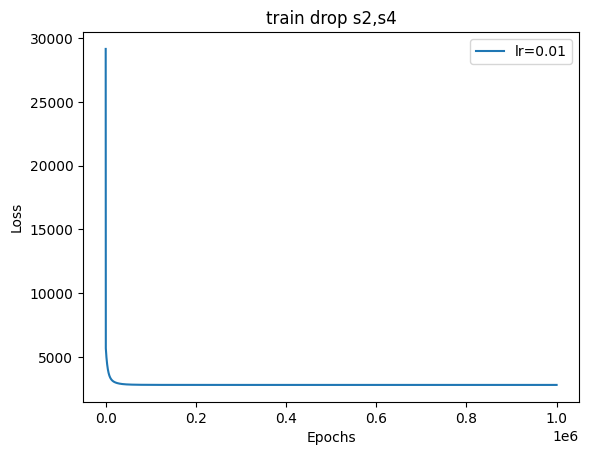

In [226]:
#10. test데이터에 대한 성능 확인하기
test_prediction = Model(X_test, W=best_W, b=best_b)

test_loss = Loss(y_test, test_prediction)

print("==========================================================================")
print(f"Loss in test with learning rate = {learning_rate} : {test_loss} \n  W : {best_W}\n  b : {best_b}\n")

import matplotlib.pyplot as plt
plt.plot(losses, label= f'lr={learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train drop s2,s4')
plt.legend()
plt.show()


In [227]:
df_X_without_s1 = np.delete(df_X, 4, axis=1)
learning_rate = 0.01

num_features = df_X_without_s1.shape[1]
np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_without_s1, df_y, test_size=0.2, random_state=2025)

In [228]:
#9. 모델 학습하기
epoch = 1000000
losses = []
min_loss = float('inf')
best_W, best_b = None, None

W_copy = W
b_copy = b
    
for _ in range(epoch):
    prediction = Model(X_train, W=W_copy, b=b_copy)
    loss = Loss(y_train, prediction)
    losses.append(loss)
    
    # 최소 손실값 갱신
    if loss < min_loss:
        min_loss = loss
        best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
        best_b = b_copy  # 최소 손실값에서의 b 저장
    
    dW, db = gradient(X_train, y_train, prediction)
    W_copy -= learning_rate * dW
    b_copy -= learning_rate * db

Loss in test with learning rate = 0.01 : 3185.515968224889 
  W : [  20.82237436 -235.20660521  547.50310475  324.33967263 -129.55882321
 -275.10020488  -11.96918949  471.80000462   56.40622969]
  b : 153.74939451282197



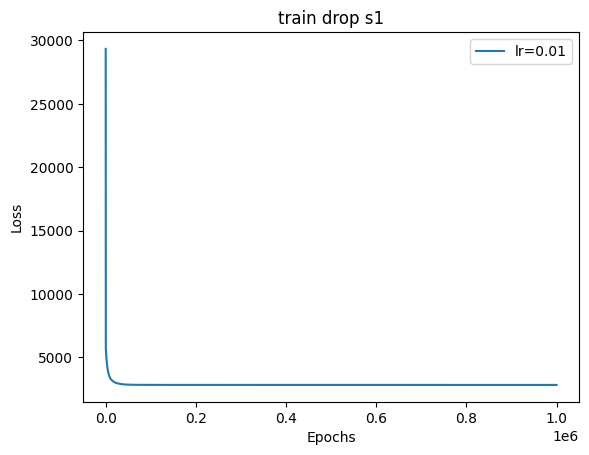

In [229]:
#10. test데이터에 대한 성능 확인하기
test_prediction = Model(X_test, W=best_W, b=best_b)

test_loss = Loss(y_test, test_prediction)

print("==========================================================================")
print(f"Loss in test with learning rate = {learning_rate} : {test_loss} \n  W : {best_W}\n  b : {best_b}\n")

import matplotlib.pyplot as plt
plt.plot(losses, label= f'lr={learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train drop s1')
plt.legend()
plt.show()


In [230]:
df_X_without_s2_s3 = np.delete(df_X, [5,6], axis=1)
learning_rate = 0.01

num_features = df_X_without_s2_s3.shape[1]
np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_without_s2_s3, df_y, test_size=0.2, random_state=2025)

In [231]:
#9. 모델 학습하기
epoch = 1000000
losses = []
min_loss = float('inf')
best_W, best_b = None, None

W_copy = W
b_copy = b
    
for _ in range(epoch):
    prediction = Model(X_train, W=W_copy, b=b_copy)
    loss = Loss(y_train, prediction)
    losses.append(loss)
    
    # 최소 손실값 갱신
    if loss < min_loss:
        min_loss = loss
        best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
        best_b = b_copy  # 최소 손실값에서의 b 저장
    
    dW, db = gradient(X_train, y_train, prediction)
    W_copy -= learning_rate * dW
    b_copy -= learning_rate * db

Loss in test with learning rate = 0.01 : 3177.443719729547 
  W : [  25.51734809 -228.49723988  559.84091285  323.95447864 -322.12282226
  219.61933471  554.39579567   53.01387555]
  b : 153.69538323250103



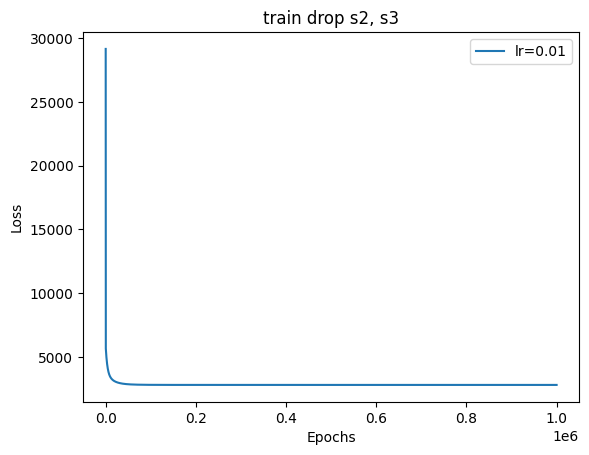

In [232]:
#10. test데이터에 대한 성능 확인하기
test_prediction = Model(X_test, W=best_W, b=best_b)

test_loss = Loss(y_test, test_prediction)

print("==========================================================================")
print(f"Loss in test with learning rate = {learning_rate} : {test_loss} \n  W : {best_W}\n  b : {best_b}\n")

import matplotlib.pyplot as plt
plt.plot(losses, label= f'lr={learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train drop s2, s3')
plt.legend()
plt.show()


In [233]:
# s2만 제외하는 것이 성능이 제일 괜찮은 걸로 판단
# test에서의 성능이 계속 부족한 것을 확인 = epoch에 따른 overfitting 문제가 발생한 것을 확인 : epoch 조정으로 test셋에서 3000이하 달성 완료 

df_X_without_s2 = diabetes.data[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]]
learning_rate = 0.01

num_features = df_X_without_s2.shape[1]
np.random.seed(2025)
W = np.random.randn(num_features)
b = np.random.randn()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X_without_s2, df_y, test_size=0.3, random_state=2025)

In [234]:
#9. 모델 학습하기
epoch = 35000
losses = []
min_loss = float('inf')
best_W, best_b = None, None

W_copy = W
b_copy = b
    
for _ in range(epoch):
    prediction = Model(X_train, W=W_copy, b=b_copy)
    loss = Loss(y_train, prediction)
    losses.append(loss)
    
    # 최소 손실값 갱신
    if loss < min_loss:
        min_loss = loss
        best_W = W_copy.copy()  # 최소 손실값에서의 W 복사 저장
        best_b = b_copy  # 최소 손실값에서의 b 저장
    
    dW, db = gradient(X_train, y_train, prediction)
    W_copy -= learning_rate * dW
    b_copy -= learning_rate * db

train minloss : 2905.7327169767673
Loss in test with learning rate = 0.01 : 2975.0118552969193 
  W : [  15.50963954 -174.69753455  489.32411026  296.796432   -100.35899052
 -197.21026461  106.00286002  366.07413169  114.15055019]
  b : 154.43099403725148



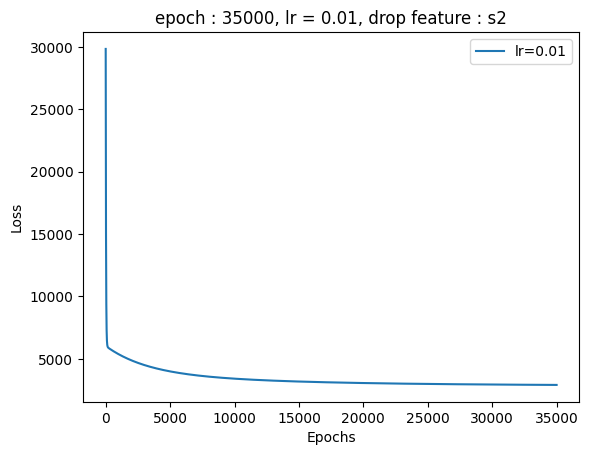

In [235]:
#최종 마무리 - consequence.txt로 저장
test_prediction = Model(X_test, W=best_W, b=best_b)

test_loss = Loss(y_test, test_prediction)

print("==========================================================================")
print(f"train minloss : {min_loss}")
print(f"Loss in test with learning rate = {learning_rate} : {test_loss} \n  W : {best_W}\n  b : {best_b}\n")

import matplotlib.pyplot as plt
plt.plot(losses, label= f'lr={learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('epoch : 35000, lr = 0.01, drop feature : s2')
plt.legend()
plt.show()


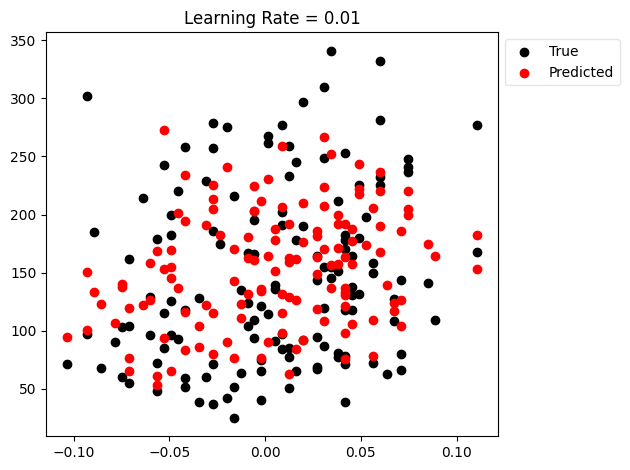

In [240]:
#11. 정답 데이터와 예측한 데이터 시각화하기
fig = plt.figure()
axes = fig.add_subplot()

axes.scatter(x=X_test[:, 0], y=y_test, color='black', label='True')
axes.scatter(x=X_test[:, 0], y=test_prediction, color='red', label='Predicted')
axes.set_title(f'Learning Rate = {learning_rate}')
axes.legend(loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.5)

plt.tight_layout()
plt.savefig('consequence.png')
plt.show()
